# Data Import

In [1]:
# Train & test
import pandas as pd
df_train=pd.read_csv(r'C:\Users\ppulivarthi\AV_Hackthons\Janathahack_HR_Analytics\train_jqd04QH.csv')

Basic checkpoints

In [2]:
print("******** No.of Row's and Column's in Dataframe********* \n ",df_train.shape,
     "\n \n **************Columns in Dataframe*********** \n ",df_train.columns,
     "\n \n **************Top 5 Row's in Dataframe *********** \n ",df_train.head())


******** No.of Row's and Column's in Dataframe********* 
  (54808, 14) 
 
 **************Columns in Dataframe*********** 
  Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object') 
 
 **************Top 5 Row's in Dataframe *********** 
     employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing             

In [3]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


# Missing Value imputation

In [4]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [5]:
Miss_values=pd.DataFrame(df_train.isnull().sum(),columns=["Missing_value_count"])

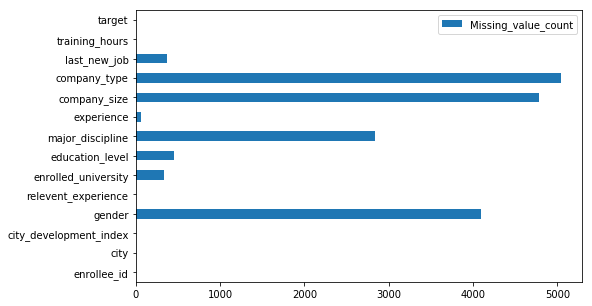

In [7]:
Miss_values.plot.barh(figsize=(8,5))

In [ ]:
# Miss_values=pd.DataFrame(df_train.isnull().sum(),columns=["Missing_value_count"])
# Miss_values

In [8]:
Miss_values

,Missing_value_count
enrollee_id,0
city,0
city_development_index,0
gender,4098
relevent_experience,0
enrolled_university,342
education_level,457
major_discipline,2838
experience,59
company_size,4779


In [9]:
Miss_values.reset_index(inplace=True)
Miss_values1=Miss_values.rename(columns={ "index" : "Variable_Name", 0 : "Missing_values_count"})

In [10]:
Miss_values1["Total"]=Miss_values1.Missing_value_count.sum()

In [11]:
Miss_values1["Missing_value_percent"]=((Miss_values1.Missing_value_count/Miss_values1.Total)*100)

In [12]:
Miss_values1

,Variable_Name,Missing_value_count,Total,Missing_value_percent
0,enrollee_id,0,17979,0.000000
1,city,0,17979,0.000000
2,city_development_index,0,17979,0.000000
3,gender,4098,17979,22.793259
4,relevent_experience,0,17979,0.000000
5,enrolled_university,342,17979,1.902219
6,education_level,457,17979,2.541854
7,major_discipline,2838,17979,15.785083
8,experience,59,17979,0.328161
9,company_size,4779,17979,26.581011


In [13]:
Miss_values1=Miss_values1[Miss_values1.Missing_value_count>0 ]

In [14]:
missing_value_columns=Miss_values1.Variable_Name.tolist()

In [15]:
missing_value_columns

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [16]:
missing_value_columns

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [17]:
df_missing_data=df_train[missing_value_columns]

In [18]:
df_missing_data.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [19]:
df_missing_data.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

In [20]:
df_missing_data.education_level.unique()

array(['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'],
      dtype=object)

In [21]:
df_missing_data.major_discipline.unique()

array(['STEM', 'Other', 'No Major', nan, 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

In [22]:
df_missing_data.experience.unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'],
      dtype=object)

In [23]:
df_missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               14261 non-null  object
 1   enrolled_university  18017 non-null  object
 2   education_level      17902 non-null  object
 3   major_discipline     15521 non-null  object
 4   experience           18300 non-null  object
 5   company_size         13580 non-null  object
 6   company_type         13320 non-null  object
 7   last_new_job         17992 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


In [24]:
df_missing_data.company_size.unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

In [25]:
df_missing_data.company_type.unique()

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', nan,
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

In [26]:
df_missing_data.last_new_job.unique()

array(['1', '2', '3', '>4', 'never', '4', nan], dtype=object)

In [28]:
df_miss_data1=df_missing_data.fillna(method='ffill')

In [29]:
df_miss_data1

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1
1,Male,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1
2,Male,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2
3,Male,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1
4,Male,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,2
...,...,...,...,...,...,...,...,...
18354,Male,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1
18355,Male,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1
18356,Male,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3
18357,Male,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3


In [30]:
df_train1=df_train.fillna(method='ffill')

In [31]:
df_train1.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Exploratory Data Analysis-EDA

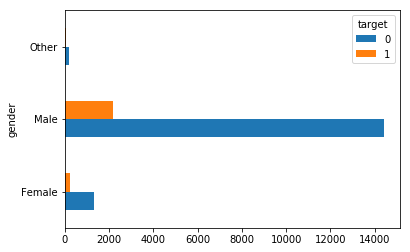

In [34]:
crss_tab_graph=pd.crosstab(df_train1.gender,df_train1.target)
crss_tab_graph.plot.barh()

In [35]:
# crss_tab_graph

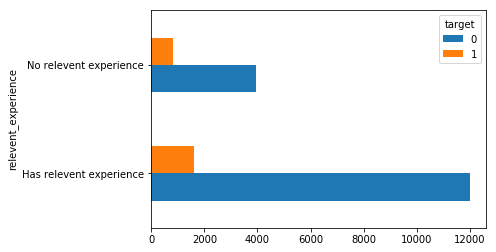

In [36]:
crss_tab_graph=pd.crosstab(df_train1.relevent_experience,df_train1.target)
crss_tab_graph.plot.barh()

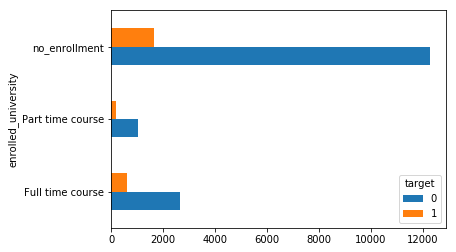

In [37]:
crss_tab_graph=pd.crosstab(df_train1.enrolled_university,df_train1.target)
crss_tab_graph.plot.barh()

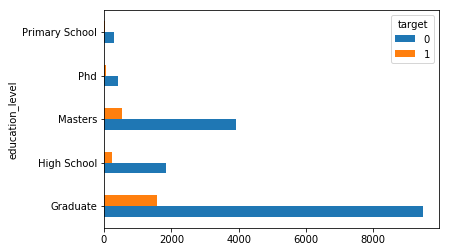

In [38]:
crss_tab_graph=pd.crosstab(df_train1.education_level,df_train1.target)
crss_tab_graph.plot.barh()

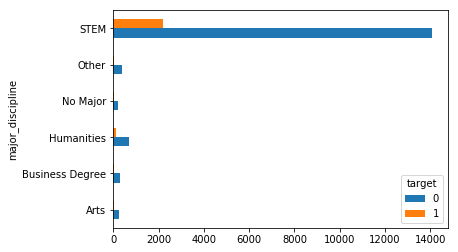

In [39]:
crss_tab_graph=pd.crosstab(df_train1.major_discipline,df_train1.target)
crss_tab_graph.plot.barh()

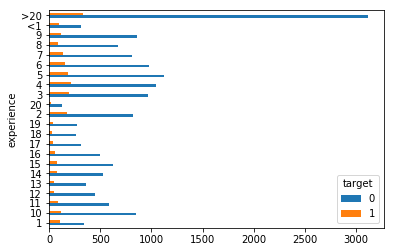

In [40]:
crss_tab_graph=pd.crosstab(df_train1.experience,df_train1.target)
crss_tab_graph.plot.barh()

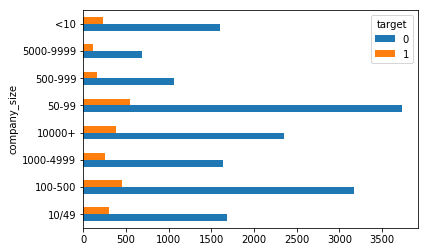

In [41]:
crss_tab_graph=pd.crosstab(df_train1.company_size,df_train1.target)
crss_tab_graph.plot.barh()

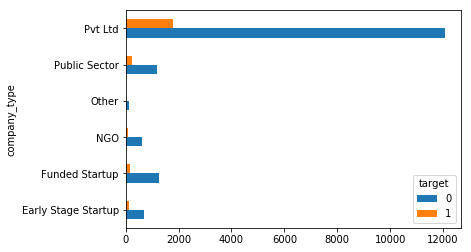

In [42]:
crss_tab_graph=pd.crosstab(df_train1.company_type,df_train1.target)
crss_tab_graph.plot.barh()

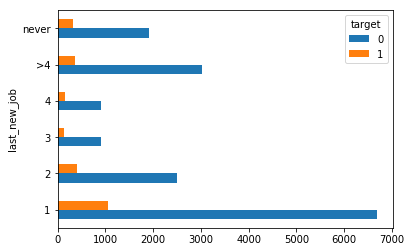

In [43]:
crss_tab_graph=pd.crosstab(df_train1.last_new_job,df_train1.target)
crss_tab_graph.plot.barh()

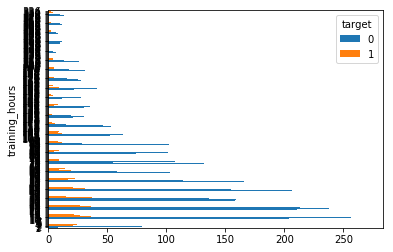

In [44]:
crss_tab_graph=pd.crosstab(df_train1.training_hours,df_train1.target)
crss_tab_graph.plot.barh()

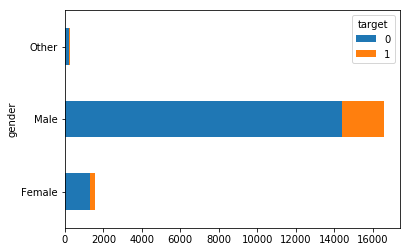

In [45]:
#stacked barcharts
crss_tab_graph=pd.crosstab(df_train1.gender,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

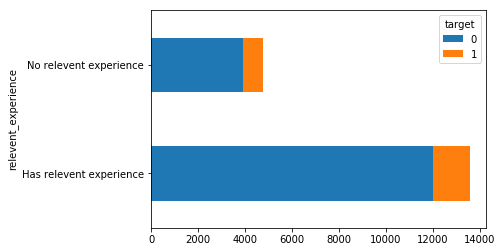

In [46]:
crss_tab_graph=pd.crosstab(df_train1.relevent_experience,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

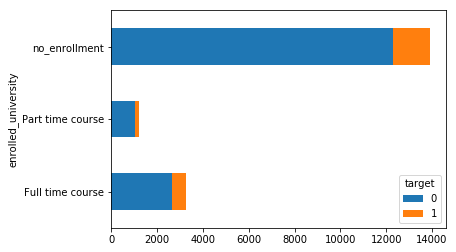

In [47]:
crss_tab_graph=pd.crosstab(df_train1.enrolled_university,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

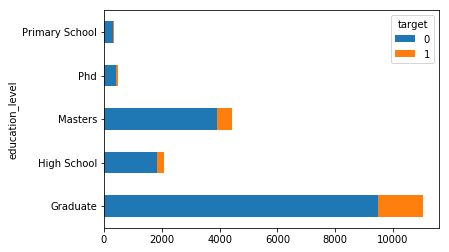

In [48]:
crss_tab_graph=pd.crosstab(df_train1.education_level,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

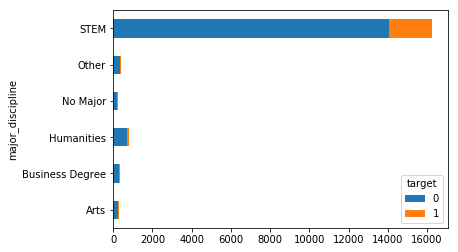

In [49]:
crss_tab_graph=pd.crosstab(df_train1.major_discipline,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

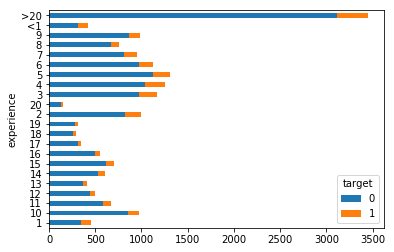

In [50]:
crss_tab_graph=pd.crosstab(df_train1.experience,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

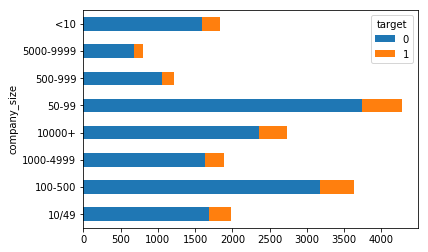

In [51]:
crss_tab_graph=pd.crosstab(df_train1.company_size,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

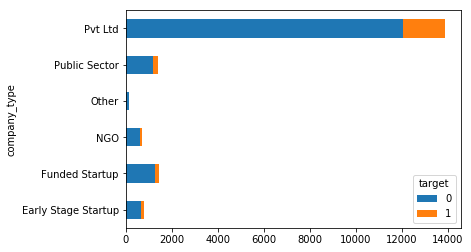

In [52]:
crss_tab_graph=pd.crosstab(df_train1.company_type,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

In [ ]:
crss_tab_graph=pd.crosstab(df_train1.last_new_job,df_train1.target)
crss_tab_graph.plot.barh(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF537119B0>,
      dtype=object)

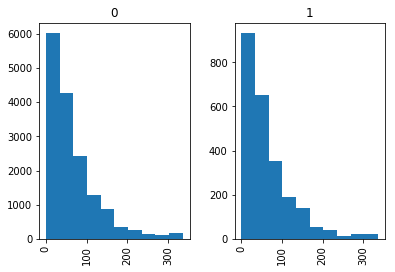

In [53]:
df_train1.hist(column='training_hours',by='target')

C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


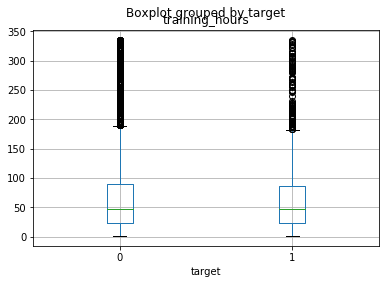

In [54]:
df_train1.boxplot(column='training_hours',by='target')

# Feature Engineering/Extraction

Chi-Square Test : To check the relationship between two categorical variables
                

In [56]:
df_train1.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [57]:
df_missing_data.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [64]:
df_train2=pd.get_dummies(df_train1, columns = ['city', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job'],drop_first=True)

In [65]:
lst=df_train2.columns.tolist()

In [66]:
lst

['enrollee_id',
 'city_development_index',
 'training_hours',
 'target',
 'city_city_10',
 'city_city_100',
 'city_city_101',
 'city_city_102',
 'city_city_103',
 'city_city_104',
 'city_city_105',
 'city_city_106',
 'city_city_107',
 'city_city_109',
 'city_city_11',
 'city_city_111',
 'city_city_114',
 'city_city_115',
 'city_city_116',
 'city_city_117',
 'city_city_118',
 'city_city_12',
 'city_city_120',
 'city_city_121',
 'city_city_123',
 'city_city_126',
 'city_city_127',
 'city_city_128',
 'city_city_129',
 'city_city_13',
 'city_city_131',
 'city_city_133',
 'city_city_134',
 'city_city_136',
 'city_city_138',
 'city_city_139',
 'city_city_14',
 'city_city_140',
 'city_city_141',
 'city_city_142',
 'city_city_143',
 'city_city_144',
 'city_city_145',
 'city_city_146',
 'city_city_149',
 'city_city_150',
 'city_city_152',
 'city_city_155',
 'city_city_157',
 'city_city_158',
 'city_city_159',
 'city_city_16',
 'city_city_160',
 'city_city_162',
 'city_city_165',
 'city_city_166

In [63]:
df_train2.gender_Female


0        0
1        0
2        0
3        0
4        0
        ..
18354    0
18355    0
18356    0
18357    0
18358    1
Name: gender_Female, Length: 18359, dtype: uint8

In [67]:
df_train2.drop(['enrollee_id','city_development_index'],axis=1,inplace=True)

In [68]:
X = df_train2.loc[:, df_train2.columns != 'target']
y = df_train2.loc[:, df_train2.columns == 'target']

In [ ]:
# filter-1

In [ ]:
sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, *, k=10)

In [69]:

# Feature engineering
from sklearn.feature_selection import SelectKBest, chi2
bestfeature=SelectKBest(score_func=chi2,k=10)
fit=bestfeature.fit(X,y)
df_chi_score=pd.DataFrame(fit.scores_)
df_p_score=pd.DataFrame(fit.pvalues_)
df_columns=pd.DataFrame(X.columns)
feature_score=pd.concat([df_columns,df_chi_score,df_p_score],axis=1)
feature_score.columns=['features','chi_score','P_score']
# feature_score
feature_score.sort_values(by=['chi_score'],ascending=False,inplace=True)

In [70]:
feature_score

,features,chi_score,P_score
64,city_city_21,281.163904,4.187581e-63
125,relevent_experience_No relevent experience,74.628781,5.680895e-18
156,experience_<1,44.468780,2.584458e-11
157,experience_>20,37.449362,9.381737e-10
127,enrolled_university_no_enrollment,26.601721,2.500210e-07
...,...,...,...
57,city_city_176,0.010517,9.183178e-01
27,city_city_131,0.007082,9.329349e-01
110,city_city_81,0.007082,9.329349e-01
56,city_city_175,0.007011,9.332678e-01


In [71]:
fs=feature_score[feature_score.P_score<=0.05]

In [72]:
fs.shape

(38, 3)

In [ ]:
fs

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [74]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression(solver='lbfgs',multi_class='auto')

In [75]:
model.fit(X_train,y_train)

C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [76]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
y_pred = model.predict(X_test)
print("clss",accuracy_score(y_pred,y_test))
print("clss",classification_report(y_pred,y_test))

print("confusion_matrix",confusion_matrix(y_pred,y_test))
print("f1_score",f1_score(y_pred,y_test))


clss 0.8638344226579521
clss               precision    recall  f1-score   support

           0       1.00      0.86      0.93      3672
           1       0.00      0.00      0.00         0

    accuracy                           0.86      3672
   macro avg       0.50      0.43      0.46      3672
weighted avg       1.00      0.86      0.93      3672

confusion_matrix [[3172  500]
 [   0    0]]
f1_score 0.0


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
